In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import pearsonr
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
pip install prophet

In [ ]:
sales=pd.read_csv("Walmart DataSet.csv")
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#data Cleaning here date field wants to convert date time field
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')
sales['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Check for missing values in weekly sales data
print("Missing values in weekly sales data:")
print(sales.isnull().sum())

Missing values in weekly sales data:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
correlation = sales['Weekly_Sales'].corr(sales['Unemployment'])
print("Correlation coefficient between weekly sales and unemployment rate:", correlation)

Correlation coefficient between weekly sales and unemployment rate: -0.10617608965795429


In [ ]:
# For example, you can group the data by store and calculate the average weekly sales and unemployment rate
store_stats = sales.groupby('Store').agg({'Weekly_Sales':'mean', 'Unemployment':'mean'})
store_stats

,Weekly_Sales,Unemployment
Store,,
1,1.555264e+06,7.610420
2,1.925751e+06,7.623846
3,4.027044e+05,7.176986
4,2.094713e+06,5.964692
5,3.180118e+05,6.295406
6,1.564728e+06,6.606902
7,5.706173e+05,8.585734
8,9.087495e+05,6.091846
9,5.439806e+05,6.099881


In [ ]:
# Then, identify stores with the highest negative correlation between weekly sales and unemployment rate
most_affected_stores = store_stats.sort_values(by='Unemployment', ascending=False)
print("Stores suffering the most due to unemployment rate:")
print(most_affected_stores)


Stores suffering the most due to unemployment rate:
       Weekly_Sales  Unemployment
Store                            
28     1.323522e+06     13.116483
38     3.857317e+05     13.116483
12     1.009002e+06     13.116483
43     6.333247e+05      9.934804
34     9.667816e+05      9.934804
29     5.394514e+05      9.806385
18     1.084718e+06      8.838301
35     9.197250e+05      8.788573
14     2.020978e+06      8.648748
45     7.859814e+05      8.648748
7      5.706173e+05      8.585734
32     1.166568e+06      8.585734
33     2.598617e+05      8.533154
24     1.356755e+06      8.447014
10     1.899425e+06      8.362965
42     5.564039e+05      8.362965
22     1.028501e+06      8.069371
27     1.775216e+06      8.001748
15     6.233125e+05      7.996252
19     1.444999e+06      7.996252
26     1.002912e+06      7.872070
36     3.735120e+05      7.869049
39     1.450668e+06      7.869049
37     5.189003e+05      7.869049
21     7.560691e+05      7.623846
2      1.925751e+06      7.623

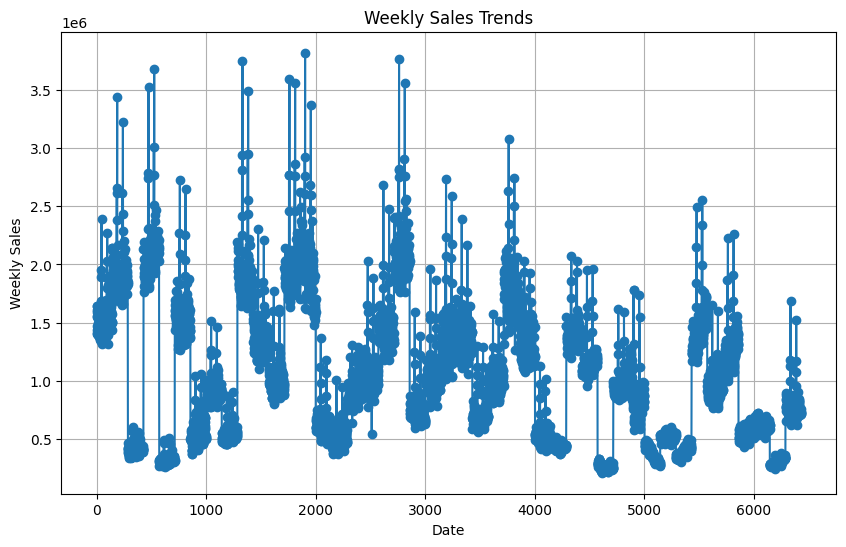

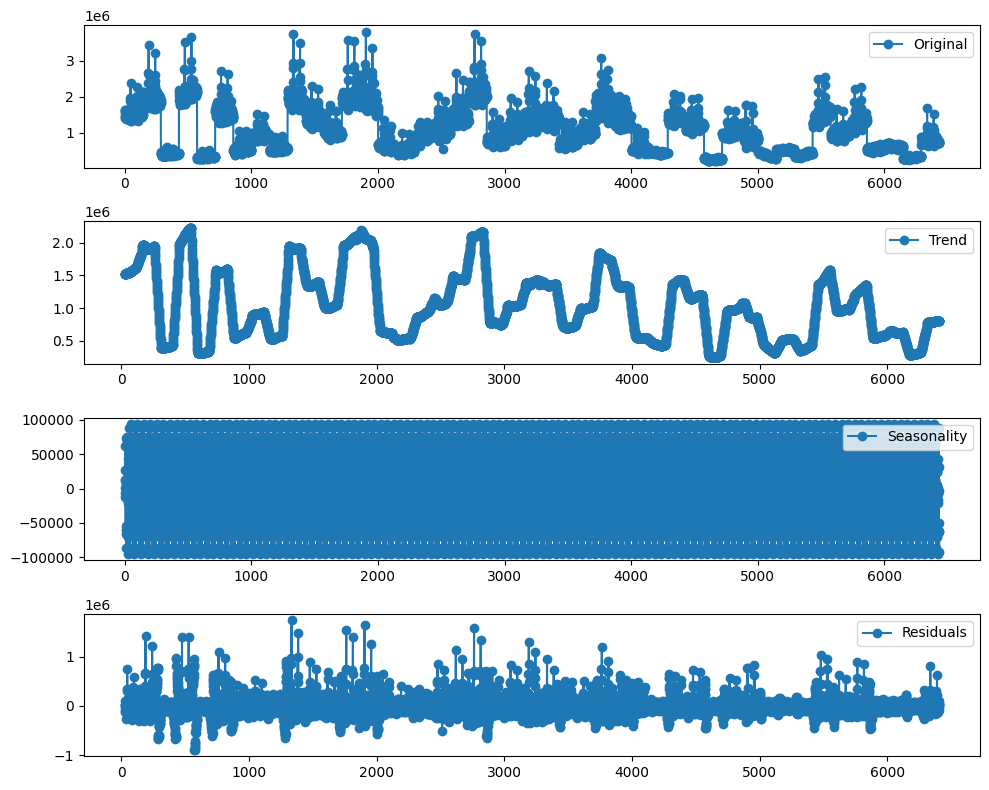

In [ ]:
# Visualize the weekly sales trends over time
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10, 6))
plt.plot(sales.index, sales['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Use seasonal decomposition to identify seasonal patterns
decomposition = seasonal_decompose(sales['Weekly_Sales'], model='additive', period=52)  # Assuming weekly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(sales.index, sales['Weekly_Sales'], label='Original', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(sales.index, trend, label='Trend', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sales.index, seasonal, label='Seasonality', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(sales.index, residual, label='Residuals', marker='o', linestyle='-')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#Does temperature affect the weekly sales in any manner ?

Weekly_Sales=sales['Weekly_Sales']
Temperature=sales['Temperature']
merged_data = pd.merge(Weekly_Sales, Temperature, left_index=True, right_index=True, how='inner')

# Perform correlation analysis
correlation = merged_data['Weekly_Sales'].corr(merged_data['Temperature'])
print("Correlation between weekly sales and temperature:", correlation)

Correlation between weekly sales and temperature: -0.06381001317946956


In [ ]:
# In summary, based on the correlation coefficient of -0.0638,
# there is a weak negative correlation between weekly sales and temperature.
# However, this correlation alone may not provide a comprehensive understanding of the relationship between the two variables,
# and further analysis may be needed to uncover any underlying patterns or causal relationships.

In [ ]:
sales_cpi = sales['CPI']
correlation = sales_cpi.corr(Weekly_Sales)
print("Correlation coefficient between CPI and weekly sales:", correlation)

Correlation coefficient between CPI and weekly sales: -0.07263416204017632


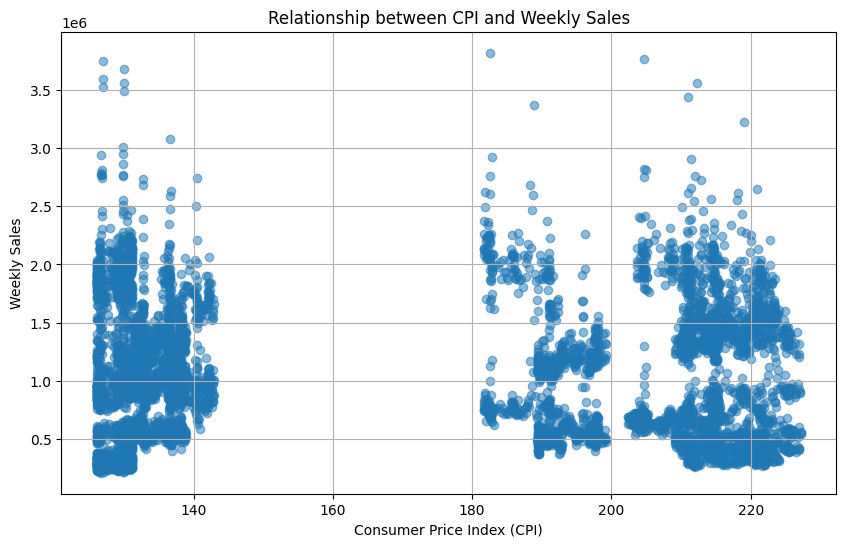

In [ ]:

# Step 4: Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(sales_cpi, Weekly_Sales, alpha=0.5)
plt.title('Relationship between CPI and Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

**Top performing stores according to the historical data**

In [ ]:
store_sales = sales.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores based on total sales in descending order
top_performing_stores = store_sales.sort_values(ascending=False)

# Print the top-performing stores
print("Top Performing Stores:")
for store_id, total_sales in top_performing_stores.items():
    print(f"Store {store_id}: Total Sales = {total_sales}")

Top Performing Stores:
Store 20: Total Sales = 301397792.46
Store 4: Total Sales = 299543953.38
Store 14: Total Sales = 288999911.34
Store 13: Total Sales = 286517703.8
Store 2: Total Sales = 275382440.98
Store 10: Total Sales = 271617713.89
Store 27: Total Sales = 253855916.88
Store 6: Total Sales = 223756130.64
Store 1: Total Sales = 222402808.85
Store 39: Total Sales = 207445542.47
Store 19: Total Sales = 206634862.1
Store 31: Total Sales = 199613905.5
Store 23: Total Sales = 198750617.85
Store 24: Total Sales = 194016021.28
Store 11: Total Sales = 193962786.8
Store 28: Total Sales = 189263680.58
Store 41: Total Sales = 181341934.89000002
Store 32: Total Sales = 166819246.16
Store 18: Total Sales = 155114734.21
Store 22: Total Sales = 147075648.57
Store 12: Total Sales = 144287230.15
Store 26: Total Sales = 143416393.79
Store 34: Total Sales = 138249763.0
Store 40: Total Sales = 137870309.79
Store 35: Total Sales = 131520672.08
Store 8: Total Sales = 129951181.13
Store 17: Total Sal

**The worst performing store, and how significant is the difference between the
highest and lowest performing stores**

In [ ]:
worst_performing_store = store_sales.idxmin()
lowest_sales = store_sales.min()

# Find the best-performing store (store with the highest total sales)
best_performing_store = store_sales.idxmax()
highest_sales = store_sales.max()

# Calculate the difference in total sales between the highest and lowest performing stores
difference = highest_sales - lowest_sales

# Print the results
print(f"The worst-performing store is Store {worst_performing_store} with total sales of {lowest_sales}")
print(f"The best-performing store is Store {best_performing_store} with total sales of {highest_sales}")
print(f"The difference between the highest and lowest performing stores is {difference}")

The worst-performing store is Store 33 with total sales of 37160221.96
The best-performing store is Store 20 with total sales of 301397792.46
The difference between the highest and lowest performing stores is 264237570.49999997


In [ ]:
grouped_data = sales.groupby('Store')

# Step 4: Time Series Modeling and Forecasting
forecasts = {}
for store_id, store_data in grouped_data:
    # Fit SARIMA model
    model = SARIMAX(sales['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit()

    # Make forecasts for the next 12 weeks
    forecast = fitted_model.forecast(steps=12)
    forecasts[store_id] = forecast

# Step 5: Print or Save Forecasts
for store_id, forecast in forecasts.items():
    print(f"Forecast for Store {store_id}:")
    print(forecast)

Forecast for Store 1:
6435    745860.231150
6436    745794.537528
6437    735738.305899
6438    747708.644367
6439    740638.952220
6440    742725.976649
6441    729105.770388
6442    741561.883223
6443    739964.497572
6444    746578.998860
6445    735578.215510
6446    741183.118823
Name: predicted_mean, dtype: float64
Forecast for Store 2:
6435    745860.231150
6436    745794.537528
6437    735738.305899
6438    747708.644367
6439    740638.952220
6440    742725.976649
6441    729105.770388
6442    741561.883223
6443    739964.497572
6444    746578.998860
6445    735578.215510
6446    741183.118823
Name: predicted_mean, dtype: float64
Forecast for Store 3:
6435    745860.231150
6436    745794.537528
6437    735738.305899
6438    747708.644367
6439    740638.952220
6440    742725.976649
6441    729105.770388
6442    741561.883223
6443    739964.497572
6444    746578.998860
6445    735578.215510
6446    741183.118823
Name: predicted_mean, dtype: float64
Forecast for Store 4:
6435    7